In [1]:
from maelzel.core import *
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.scoring import quantutils
from maelzel import tui
from maelzel.common import F
import logging
logging.getLogger('maelzel.scoring').setLevel('DEBUG')

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:2 2♩», «4C# 2:2.143 1/7♩», «4D 2.143:3.333 25/21♩»]). Filling gaps with silences


Beat: 2 - 3 (dur: 1)
Best 3 divisions: (quantized in 7.3ms)


error,div,snapped,slots,info
0.0020,"(7,)","[«4C# 0:0.143 1/7♩», «4D~ 0.143:1 6/7♩»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0769,"(6,)","[«4C# 0:0.167 1/6♩», «4D~ 0.167:1 5/6♩»]","[0, 1]","gridError=0.0756, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1457,"(5,)","[«4C# 0:0.2 1/5♩», «4D~ 0.2:1 4/5♩»]","[0, 1]","gridError=0.146, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 3 - 4 (dur: 1)
Best 2 divisions: (quantized in 240.3µs)


error,div,snapped,slots,info
0.0000,"(3,)","[«~4D 0:0.333 1/3♩», «rest 0.333:1 2/3♩»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1336,"(5,)","[«~4D 0:0.4 2/5♩», «rest 0.4:1 3/5♩»]","[0, 2]","gridError=0.134, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «4C~ 0:1 1♩»
)
    Node(1/1, 
  «~4C 1:2 1♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «4C 0:2 2♩»
)
[maelzel.scoring:node.py:707:_splitUnnecessaryNodes:DEBUG] Did not split node Node(1/1, 
  Node(1/1, 
    «4C 0:2 2♩»
  )
  Node(7/4, 
    «4C# 2:2.143 1/7♩ 7/4»
    «4D~ 2.143:3 6/7♩ 7/4»
  )
  Node(3/2, 
    «~4D 3:3.333 1/3♩ 3/2»
    «rest 3.333:4 2/3♩ 3/2»
  )
) at 1
[maelzel.scoring:renderlily.py:1141:write:DEBUG] Rendering lilypond '/home/em/.cache/tmpsi9ddzcl/2xdkml_1.ly' to '/home/em/.cache/tmpsi9ddzcl/2xdkml_1.png'
[maelzel.scoring:renderlily.py:1154:write:DEBUG] Found crop file /home/em/.cache/tmpsi9ddzcl/2xdkml_1.cropped.png, using that as output



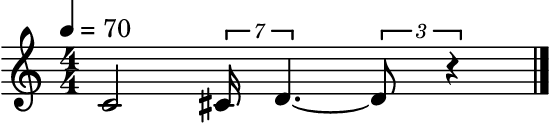

In [2]:
notes = [
    (60, F(2, 1)),
    (61, F(1, 7)),
    (62, F(6, 7)+F(1, 3))
]

struct = ScoreStruct(timesig='4/4', tempo=70)

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.UnquantizedPart(notations)
qprofile = scoring.quant.QuantizationProfile.fromPreset('high')
qprofile.debug = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=qprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:2 2♩», «4C# 2:2.75 3/4♩», «4D# 2.75:3 1/4♩»]). Filling gaps with silences


Beat: 2 - 3 (dur: 1)
Best 3 divisions: (quantized in 7.1ms)


error,div,snapped,slots,info
0.0010,"(4,)","[«4C# 0:0.75 3/4♩», «4D# 0.75:1 1/4♩»]","[0, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1201,"(7,)","[«4C# 0:0.714 5/7♩», «4D# 0.714:1 2/7♩»]","[0, 5]","gridError=0.119, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2157,"(3,)","[«4C# 0:0.667 2/3♩», «4D# 0.667:1 1/3♩»]","[0, 2]","gridError=0.216, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «4C~ 0:1 1♩»
)
    Node(1/1, 
  «~4C 1:2 1♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «4C 0:2 2♩»
)
[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «4C 0:2 2♩»
)
Node(1/1, 
  «4C# 2:2.75 3/4♩»
  «4D# 2.75:3 1/4♩»
)
----> no need to extend node over beat
[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «4C# 2:2.75 3/4♩»
  «4D# 2.75:3 1/4♩»
)
Node(1/1, 
  «rest 3:4 1♩»
)
----> no need to extend node over beat
[maelzel.scoring:node.py:707:_splitUnnecessaryNodes:DEBUG] Did not split node Node(1/1, 
  Node(1/1, 
    «4C 0:2 2♩»
  )
  Node(1/1, 
    «4C# 2:2.75 3/4♩»
    «4D# 2.75:3 1/4♩»
  )
  Node(1/1, 
    «rest 3:4 1♩»
  )
) at 1
[maelzel.scoring:renderlily.py:1141:write:DEBUG] Rendering lilypond '/home/em/.cache/tmpsi9ddzcl/poqoq5li.ly' to '/home/em/.cache/tmpsi9ddzcl/poqoq5li


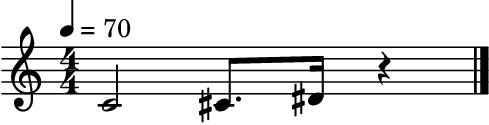

In [3]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct

notes = [
    (60, F(2, 1)),
    (61, F(3, 4)),
    (63, F(1, 4)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest')
quantprofile.debug = True
quantprofile.debugMaxDivisions = 20
quantprofile.rhythmComplexityWeight = 0.001
quantprofile.divisionErrorWeight = 0.01
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
r

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:2 2♩», «4C# 2:2.75 3/4♩», «4D# 2.75:2.792 1/24♩», «4E 2.792:3 5/24♩»]). Filling gaps with silences


Beat: 2 - 3 (dur: 1)
Best 8 divisions: (quantized in 13.7ms)


error,div,snapped,slots,info
0.0099,"(1, 1, 1, 6)","[«4C# 0:0.75 3/4♩», «4D# 0.75:0.792 1/24♩», «4E 0.792:1 5/24♩»]","[0, 3, 4]","gridError=0, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.03 (0.0003, divPenalty=0.03, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0106,"(1, 1, 8)","[«4C# 0:0.75 3/4♩», «4D# 0.75:0.792 1/24♩», «4E 0.792:1 5/24♩»]","[0, 4, 5]","gridError=0, rhythmComplexity=0.333 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0819,"(1, 8)","[«4C# 0:0.75 3/4♩», «4D# 0.75:0.812 1/16♩», «4E 0.812:1 3/16♩»]","[0, 5, 6]","gridError=0.0817, rhythmComplexity=0.149 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0955,"(15,)","[«4C# 0:0.733 11/15♩», «4D# 0.733:0.8 1/15♩», «4E 0.8:1 1/5♩»]","[0, 11, 12]","gridError=0.0929, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.002025, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0981,"(9,)","[«4C# 0:0.778 7/9♩», «4D# 0.778:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 24)}», «4E 0.778:1 2/9♩»]","[0, 7, 7]","gridError=0.0981, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.0004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1189,"(4,)","[«4C# 0:0.75 3/4♩», «4D# 0.75:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 24)}», «4E 0.75:1 1/4♩»]","[0, 3, 3]","gridError=0.119, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2473,"(7,)","[«4C# 0:0.714 5/7♩», «4D# 0.714:0.857 1/7♩», «4E 0.857:1 1/7♩»]","[0, 5, 6]","gridError=0.247, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2866,"(6,)","[«4C# 0:0.667 2/3♩», «4D# 0.667:0.833 1/6♩», «4E 0.833:1 1/6♩»]","[0, 4, 5]","gridError=0.287, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «4C~ 0:1 1♩»
)
    Node(1/1, 
  «~4C 1:2 1♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «4C 0:2 2♩»
)
[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «4C 0:2 2♩»
)
Node(1/1, 
  «4C# 2:2.75 3/4♩»
  Node(3/2, 
    «4D# 2.75:2.792 1/24♩ 3/2»
    «4E~ 2.792:2.833 1/24♩ 3/2»
    «~4E 2.833:3 1/6♩ 3/2»
  )
)
----> no need to extend node over beat
[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «4C# 2:2.75 3/4♩»
  Node(3/2, 
    «4D# 2.75:2.792 1/24♩ 3/2»
    «4E~ 2.792:2.833 1/24♩ 3/2»
    «~4E 2.833:3 1/6♩ 3/2»
  )
)
Node(1/1, 
  «rest 3:4 1♩»
)
----> no need to extend node over beat
[maelzel.scoring:node.py:707:_splitUnnecessaryNodes:DEBUG] Did not split node Node(1/1, 
  Node(1/1, 
    «4C 0:2 2♩»
  )
  Node(1/1, 
    «4C# 2:2.75 3/4♩»
    Node(3/2, 
      «4D# 2.75:2.792 1/24♩ 3


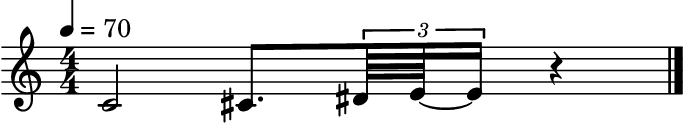

In [4]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct

notes = [
    (60, F(2, 1)),
    (61, F(3, 4)),
    (63, F(1, 4)*F(1, 6)),
    (64, F(1, 4)*F(5, 6)),
    # (62, F(3, 4))
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest')
quantprofile.debug = True
quantprofile.debugMaxDivisions = 20
quantprofile.rhythmComplexityWeight = 0.001
quantprofile.divisionErrorWeight = 0.01
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
r

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:0.133 2/15♩», «4C# 0.133:0.267 2/15♩», «4D 0.267:0.4 2/15♩», «4D# 0.4:0.533 2/15♩», «4E 0.533:0.667 2/15♩», «4F 0.667:1.333 2/3♩»]). Filling gaps with silences


Beat: 0 - 1 (dur: 1)
Best 5 divisions: (quantized in 169.6ms)


error,div,snapped,slots,info
0.0030,"(5, 5, 1)","[«4C 0:0.133 2/15♩», «4C# 0.133:0.267 2/15♩», «4D 0.267:0.4 2/15♩», «4D# 0.4:0.533 2/15♩», «4E 0.533:0.667 2/15♩», «4F~ 0.667:1 1/3♩»]","[0, 2, 4, 6, 8, 10]","gridError=0, rhythmComplexity=0.0745 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0424 (8.485e-05, divPenalty=0.0283, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0102,"(15,)","[«4C 0:0.133 2/15♩», «4C# 0.133:0.267 2/15♩», «4D 0.267:0.4 2/15♩», «4D# 0.4:0.533 2/15♩», «4E 0.533:0.667 2/15♩», «4F~ 0.667:1 1/3♩»]","[0, 2, 4, 6, 8, 10]","gridError=0, rhythmComplexity=0.149 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.000405, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.2403,"(8,)","[«4C 0:0.125 1/8♩», «4C# 0.125:0.25 1/8♩», «4D 0.25:0.375 1/8♩», «4D# 0.375:0.5 1/8♩», «4E 0.5:0.625 1/8♩», «4F~ 0.625:1 3/8♩»]","[0, 1, 2, 3, 4, 5]","gridError=0.24, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (2e-05, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2639,"(7,)","[«4C 0:0.143 1/7♩», «4C# 0.143:0.286 1/7♩», «4D 0.286:0.429 1/7♩», «4D# 0.429:0.571 1/7♩», «4E 0.571:0.714 1/7♩», «4F~ 0.714:1 2/7♩»]","[0, 1, 2, 3, 4, 5]","gridError=0.264, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.3209,"(6,)","[«4C 0:0.167 1/6♩», «4C# 0.167:0.333 1/6♩», «4D 0.333:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(2, 15)}», «4D# 0.333:0.5 1/6♩», «4E 0.5:0.667 1/6♩», «4F~ 0.667:1 1/3♩»]","[0, 1, 2, 2, 3, 4]","gridError=0.321, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 1 divisions: (quantized in 349.8µs)


error,div,snapped,slots,info
0,"(3,)","[«~4F 0:0.333 1/3♩», «rest 0.333:1 2/3♩»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(5/4, 
  «4C 0:0.133 2/15♩ 3/2,5/4»
  «4C# 0.133:0.267 2/15♩ 3/2,5/4»
  «4D~ 0.267:0.333 1/15♩ 3/2,5/4»
)
    Node(5/4, 
  «~4D 0.333:0.4 1/15♩ 3/2,5/4»
  «4D# 0.4:0.533 2/15♩ 3/2,5/4»
  «4E 0.533:0.667 2/15♩ 3/2,5/4»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(5/4, 
  «4C 0:0.133 2/15♩ 3/2,5/4»
  «4C# 0.133:0.267 2/15♩ 3/2,5/4»
  «4D 0.267:0.4 2/15♩ 3/2,5/4»
  «4D# 0.4:0.533 2/15♩ 3/2,5/4»
  «4E 0.533:0.667 2/15♩ 3/2,5/4»
)
[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(3/2, 
  Node(5/4, 
    «4C 0:0.133 2/15♩ 3/2,5/4»
    «4C# 0.133:0.267 2/15♩ 3/2,5/4»
    «4D 0.267:0.4 2/15♩ 3/2,5/4»
    «4D# 0.4:0.533 2/15♩ 3/2,5/4»
    «4E 0.533:0.667 2/15♩ 3/2,5/4»
  )
  «4F~ 0.667:1 1/3♩ 3/2»
)
Node(3/2, 
  «~4F 1:1.333 1/3♩ 3/2»
  «rest 1.333:2 2/3♩ 3/2»
)
----> Cannot merge nested tuples 1
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Node


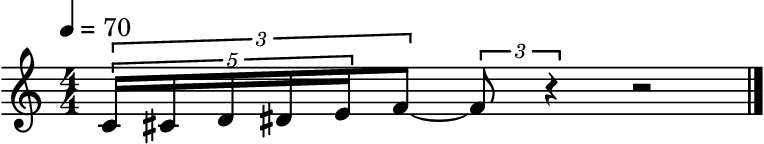

In [5]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.scoring import quantutils
from maelzel.common import F

notes = [
    (60, F(2, 3)*F(1, 5)),
    (61, F(2, 3)*F(1, 5)),
    (62, F(2, 3)*F(1, 5)),
    (63, F(2, 3)*F(1, 5)),
    (64, F(2, 3)*F(1, 5)),
    (65, F(2,3)),
    #(60, F(2, 7)),
    #(61, F(3, 7)),
    #(62, F(4, 7))
    
    
    ]

struct = ScoreStruct(timesig='4/4', tempo=70)

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest')
quantprofile.rhythmComplexityWeight  = 0.001
quantprofile.debug=True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r.write('~/tmp/bigtriplet.ly')
r

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C# 0:0.6 3/5♩», «4E 0.6:0.7 1/10♩», «4F 0.7:0.8 1/10♩», «4F# 0.8:0.9 1/10♩», «4G 0.9:1 1/10♩», «4C 1:1.2 1/5♩», «4D 1.2:1.533 1/3♩»]). Filling gaps with silences


Beat: 0 - 1 (dur: 1)
Best 8 divisions: (quantized in 30.4ms)


error,div,snapped,slots,info
0.0063,"(1, 1, 1, 2, 2)","[«4C# 0:0.6 3/5♩», «4E 0.6:0.7 1/10♩», «4F 0.7:0.8 1/10♩», «4F# 0.8:0.9 1/10♩», «4G 0.9:1 1/10♩»]","[0, 3, 4, 5, 6]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0110,"(1, 5)","[«4C# 0:0.6 3/5♩», «4E 0.6:0.7 1/10♩», «4F 0.7:0.8 1/10♩», «4F# 0.8:0.9 1/10♩», «4G 0.9:1 1/10♩»]","[0, 2, 3, 4, 5]","gridError=0, rhythmComplexity=0.0894 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1961,"(15,)","[«4C# 0:0.6 3/5♩», «4E 0.6:0.667 1/15♩», «4F 0.667:0.8 2/15♩», «4F# 0.8:0.867 1/15♩», «4G 0.867:1 2/15♩»]","[0, 9, 10, 12, 13]","gridError=0.185, rhythmComplexity=0.179 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.02025, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1972,"(11,)","[«4C# 0:0.636 7/11♩», «4E 0.636:0.727 1/11♩», «4F 0.727:0.818 1/11♩», «4F# 0.818:0.909 1/11♩», «4G 0.909:1 1/11♩»]","[0, 7, 8, 9, 10]","gridError=0.195, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.1 (0.01, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2251,"(9,)","[«4C# 0:0.556 5/9♩», «4E 0.556:0.667 1/9♩», «4F 0.667:0.778 1/9♩», «4F# 0.778:0.889 1/9♩», «4G 0.889:1 1/9♩»]","[0, 5, 6, 7, 8]","gridError=0.224, rhythmComplexity=0.179 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.04 (0.004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2607,"(8,)","[«4C# 0:0.625 5/8♩», «4E 0.625:0.75 1/8♩», «4F 0.75:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 10)}», «4F# 0.75:0.875 1/8♩», «4G 0.875:1 1/8♩»]","[0, 5, 6, 6, 7]","gridError=0.26, rhythmComplexity=0.179 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2682,"(7,)","[«4C# 0:0.571 4/7♩», «4E 0.571:0.714 1/7♩», «4F 0.714:0.857 1/7♩», «4F# 0.857:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 10)}», «4G 0.857:1 1/7♩»]","[0, 4, 5, 6, 6]","gridError=0.268, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.3386,"(6,)","[«4C# 0:0.667 2/3♩», «4E 0.667:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 10)}», «4F 0.667:0.833 1/6♩», «4F# 0.833:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 10)}», «4G 0.833:1 1/6♩»]","[0, 4, 4, 5, 5]","gridError=0.339, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:968:quantizeBeatBinary:DEBUG] Skipping (11,), totalError=0.10746131751444439 > minError=0.10363710957781679
[maelzel.scoring:quant.py:951:quantizeBeatBinary:DEBUG] Skipping (5, 9), gridError=0.0708218871599085 * 1.0 > minError=0.07063206700139031
[maelzel.scoring:quant.py:968:quantizeBeatBinary:DEBUG] Skipping (1, 1, 3, 1, 1), totalError=0.03663999029597155 > minError=0.03269386622730461


Beat: 1 - 2 (dur: 1)
Best 5 divisions: (quantized in 52.2ms)


error,div,snapped,slots,info
0.0327,"(5, 5, 1)","[«4C 0:0.2 1/5♩», «4D 0.2:0.533 1/3♩», «rest 0.533:1 7/15♩»]","[0, 3, 8]","gridError=0, rhythmComplexity=0.298 (numNotesAcrossSubdivs=2, numTies=0), divPenalty=0.0424 (0.004243, divPenalty=0.0283, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0663,"(5, 11)","[«4C 0:0.2 1/5♩», «4D 0.2:0.545 19/55♩», «rest 0.545:1 5/11♩»]","[0, 2, 6]","gridError=0.0463, rhythmComplexity=0.333 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.107 (0.01068, divPenalty=0.102, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0706,"(15,)","[«4C 0:0.2 1/5♩», «4D 0.2:0.533 1/3♩», «rest 0.533:1 7/15♩»]","[0, 3, 8]","gridError=0, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.02025, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1036,"(9,)","[«4C 0:0.222 2/9♩», «4D 0.222:0.556 1/3♩», «rest 0.556:1 4/9♩»]","[0, 2, 5]","gridError=0.103, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (0.004, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1368,"(6,)","[«4C 0:0.167 1/6♩», «4D 0.167:0.5 1/3♩», «rest 0.5:1 1/2♩»]","[0, 1, 3]","gridError=0.137, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «4E 0.6:0.7 1/10♩ 5/4»
  «4F 0.7:0.8 1/10♩ 5/4»
)
    Node(1/1, 
  «4F# 0.8:0.9 1/10♩ 5/4»
  «4G 0.9:1 1/10♩ 5/4»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «4E 0.6:0.7 1/10♩ 5/4»
  «4F 0.7:0.8 1/10♩ 5/4»
  «4F# 0.8:0.9 1/10♩ 5/4»
  «4G 0.9:1 1/10♩ 5/4»
)
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(5/4, 
  «4C 1:1.2 1/5♩ 3/2,5/4»
  «4D~ 1.2:1.333 2/15♩ 3/2,5/4»
)
    Node(5/4, 
  «~4D 1.333:1.533 1/5♩ 3/2,5/4»
  «rest 1.533:1.667 2/15♩ 3/2,5/4»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(5/4, 
  «4C 1:1.2 1/5♩ 3/2,5/4»
  «4D~ 1.2:1.333 2/15♩ 3/2,5/4»
  «~4D 1.333:1.533 1/5♩ 3/2,5/4»
  «rest 1.533:1.667 2/15♩ 3/2,5/4»
)
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 2:3 1♩»
)
    Node(1/1, 
  «rest 3:4 1♩»
)
[maelzel.scoring:quant.py:1


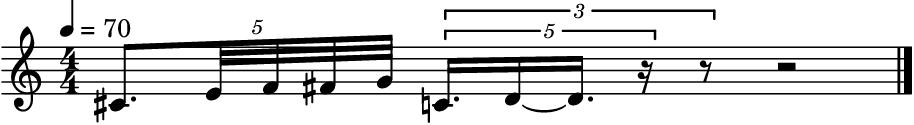

In [6]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.scoring import quantutils
from maelzel.common import F

notes = [
    (61, F(1, 2)+F(1,10)),
    (64, F(1, 10)),
    (65, F(1, 10)),
    (66, F(1, 10)),
    (67, F(1, 10)),
    
    (60, F(1, 5)),
    (62, F(1, 3)),
    
]
struct = ScoreStruct(timesig='4/4', tempo=70)

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', nestedTuplets=True)
quantprofile.divisionErrorWeight = 0.1
quantprofile.rhythmComplexityWeight = 0.01
quantprofile.debug = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C# 0:0.667 2/3♩», «4E 0.667:1.333 2/3♩», «4F 1.333:1.667 1/3♩», «4F+ 1.667:2 1/3♩»]). Filling gaps with silences


Beat: 0 - 1 (dur: 1)
Best 2 divisions: (quantized in 565.8µs)


error,div,snapped,slots,info
0.0000,"(3,)","[«4C# 0:0.667 2/3♩», «4E~ 0.667:1 1/3♩»]","[0, 2]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1636,"(5,)","[«4C# 0:0.6 3/5♩», «4E~ 0.6:1 2/5♩»]","[0, 3]","gridError=0.164, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 2 divisions: (quantized in 242.9µs)


error,div,snapped,slots,info
0.0000,"(3,)","[«~4E 0:0.333 1/3♩», «4F 0.333:0.667 1/3♩», «4F+ 0.667:1 1/3♩»]","[0, 1, 2]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2751,"(5,)","[«~4E 0:0.4 2/5♩», «4F 0.4:0.6 1/5♩», «4F+ 0.6:1 2/5♩»]","[0, 2, 3]","gridError=0.275, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.001, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  «4E~ 0.667:1 1/3♩ 3/2»
)
    Node(3/2, 
  «~4E 1:1.333 1/3♩ 3/2»
  «4F 1.333:1.667 1/3♩ 3/2»
  «4F+ 1.667:2 1/3♩ 3/2»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  «4E 0.667:1.333 2/3♩ 3/2»
  «4F 1.333:1.667 1/3♩ 3/2»
  «4F+ 1.667:2 1/3♩ 3/2»
)
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 2:3 1♩»
)
    Node(1/1, 
  «rest 3:4 1♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «rest 2:4 2♩»
)
[maelzel.scoring:node.py:707:_splitUnnecessaryNodes:DEBUG] Did not split node Node(1/1, 
  Node(3/2, 
    «4C# 0:0.667 2/3♩ 3/2»
    «4E 0.667:1.333 2/3♩ 3/2»
    «4F 1.333:1.667 1/3♩ 3/2»
    «4F+ 1.667:2 1/3♩ 3/2»
  )
  Node(1/1, 
    «rest 2:4 2♩»
  )
) at 1
[maelzel.scoring:node.py:707:_splitUnnecessaryNodes:DEBUG] Did not spl


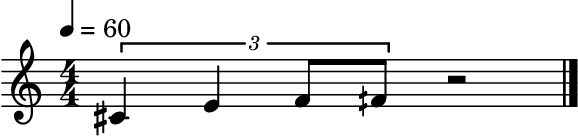

In [7]:
from maelzel import scoring
from maelzel.common import F
from maelzel.scorestruct import ScoreStruct

notes = [
    (61, F(2, 3)),
    (64, F(2, 3)),
    (65, F(1, 3)),
    (65.5, F(1, 3)),
]

notations = [scoring.makeNote(p, d) for p, d in notes]
part = scoring.UnquantizedPart(notations)

struct = ScoreStruct(timesig='4/4', tempo=60)

quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', divisionErrorWeight=0.05)
quantprofile.debug= True

qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  «4E~ 0.667:1 1/3♩ 3/2»
)
    Node(3/2, 
  «~4E 1:1.333 1/3♩ 3/2»
  «4F 1.333:1.667 1/3♩ 3/2»
  «4F+ 1.667:2 1/3♩ 3/2»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  «4E 0.667:1.333 2/3♩ 3/2»
  «4F 1.333:1.667 1/3♩ 3/2»
  «4F+ 1.667:2 1/3♩ 3/2»
)
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 2:3 1♩»
)
    Node(1/1, 
  «rest 3:4 1♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «rest 2:4 2♩»
)
[maelzel.scoring:node.py:707:_splitUnnecessaryNodes:DEBUG] Did not split node Node(1/1, 
  Node(3/2, 
    «4C# 0:0.667 2/3♩ 3/2»
    «4E 0.667:1.333 2/3♩ 3/2»
    «4F 1.333:1.667 1/3♩ 3/2»
    «4F+ 1.667:2 1/3♩ 3/2»
  )
  Node(1/1, 
    «rest 2:4 2♩»
  )
) at 1
[maelzel.scoring:node.py:707:_splitUnnecessaryNodes:DEBUG] Did not spl

Score(1 voices)
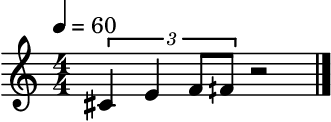

In [8]:
sco = r.quantizedScore.toCoreScore()
sco

# TODO

In [9]:
import logging
logging.basicConfig(level="DEBUG")
logging.getLogger("maelzel.scoring").setLevel(logging.DEBUG)

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:0.667 2/3♩», «4D# 0.667:0.8 2/15♩», «4E 0.8:0.933 2/15♩», «4F 0.933:1.133 1/5♩», «4F# 1.133:1.267 2/15♩», «4C# 1.267:1.933 2/3♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(3/2, 
  «4C 0:0.667 2/3♩ 3/2»
  Node(5/4, 
    «4D# 0.667:0.8 2/15♩ 3/2,5/4»
    «4E 0.8:0.933 2/15♩ 3/2,5/4»
    «4F~ 0.933:1 1/15♩ 3/2,5/4»
  )
)
Node(3/2, 
  Node(5/4, 
    «~4F 1:1.133 2/15♩ 3/2,5/4»
    «4F# 1.133:1.267 2/15♩ 3/2,5/4»
    «4C#~ 1.267:1.333 1/15♩ 3/2,5/4»
  )
  «~4C#~ 1.333:1.667 1/3♩ 3/2»
  Node(5/4, 
    «~4C# 1.667:1.933 4/15♩ 3/2,5/4»
    «rest 1.933:2 1/15♩ 3/2,5/4»
  )
)
----> nested tuplets cannot merge: Rel. duration of «4F~ 0.933:1 1/15♩ 3/2,5/4» too short to merge with «~4F 1:1.133 2/15♩ 3/2,5/4». Min side duration: 0.0833333
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 2:3 1♩»
)



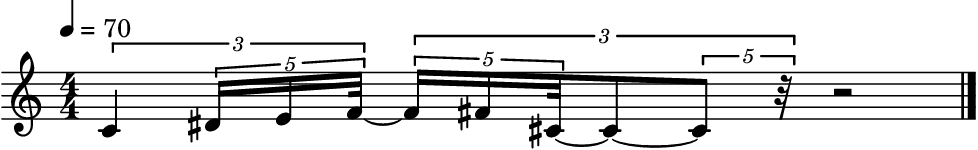

In [10]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(2, 3)),
    (63, F(2, 3)*F(1, 5)),
    (64, F(2, 3)*F(1, 5)),
    (65, F(2, 3)*F(3, 10)),
    (66, F(2, 3)*F(1, 5)),
    # (67, F(2, 3)*F(1, 5)),  
    (61, F(2, 3)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=False, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.debug = False

# quantprofile.divisionErrorWeight = 0.01
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
# r.write('~/tmp/quant.ly')
r

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:0.667 2/3♩», «4D# 0.667:0.733 1/15♩», «4E 0.733:0.8 1/15♩», «4F 0.8:1 1/5♩», «4F# 1:1.067 1/15♩», «4D# 1.067:1.133 1/15♩», «4E 1.133:1.2 1/15♩», «4F 1.2:1.333 2/15♩», «4C# 1.333:2 2/3♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:951:quantizeBeatBinary:DEBUG] Skipping (8,), gridError=0.23963107852232404 * 1.0 > minError=0.23362680579325198
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (1, 1, 5, 5), divPenalty=0.0382843 * 0.0447214 > minError=0.00167332
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (1, 1, 7, 7), divPenalty=0.0382843 * 0.0447214 > minError=0.00167332


Beat: 0 - 1 (dur: 1)
Best 4 divisions: (quantized in 23.7ms)


error,div,snapped,slots,info
0.0017,"(1, 1, 5)","[«4C 0:0.667 2/3♩», «4D# 0.667:0.733 1/15♩», «4E 0.733:0.8 1/15♩», «4F 0.8:1 1/5♩»]","[0, 2, 3, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.0374 (7.483e-05, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0093,"(15,)","[«4C 0:0.667 2/3♩», «4D# 0.667:0.733 1/15♩», «4E 0.733:0.8 1/15♩», «4F 0.8:1 1/5♩»]","[0, 10, 11, 12]","gridError=0, rhythmComplexity=0.224 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.000405, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1456,"(9,)","[«4C 0:0.667 2/3♩», «4D# 0.667:0.778 1/9♩», «4E 0.778:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 15)}», «4F 0.778:1 2/9♩»]","[0, 6, 7, 7]","gridError=0.146, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2336,"(6,)","[«4C 0:0.667 2/3♩», «4D# 0.667:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 15)}», «4E 0.667:0.833 1/6♩», «4F 0.833:1 1/6♩»]","[0, 4, 4, 5]","gridError=0.234, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:951:quantizeBeatBinary:DEBUG] Skipping (8,), gridError=0.27439348451164164 * 1.0 > minError=0.2627182078026044
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (5, 5, 1, 1), divPenalty=0.0382843 * 0.0447214 > minError=0.00167332
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (7, 7, 1, 1), divPenalty=0.0382843 * 0.0447214 > minError=0.00167332


Beat: 1 - 2 (dur: 1)
Best 4 divisions: (quantized in 20.6ms)


error,div,snapped,slots,info
0.0017,"(5, 1, 1)","[«4F# 0:0.067 1/15♩», «4D# 0.067:0.133 1/15♩», «4E 0.133:0.2 1/15♩», «4F 0.2:0.333 2/15♩», «4C# 0.333:1 2/3♩»]","[0, 1, 2, 3, 5]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.0374 (7.483e-05, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.0092,"(15,)","[«4F# 0:0.067 1/15♩», «4D# 0.067:0.133 1/15♩», «4E 0.133:0.2 1/15♩», «4F 0.2:0.333 2/15♩», «4C# 0.333:1 2/3♩»]","[0, 1, 2, 3, 5]","gridError=0, rhythmComplexity=0.179 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.202 (0.000405, divPenalty=0.2, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1903,"(9,)","[«4F# 0:0.111 1/9♩», «4D# 0.111:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 15)}», «4E 0.111:0.222 1/9♩», «4F 0.222:0.333 1/9♩», «4C# 0.333:1 2/3♩»]","[0, 1, 1, 2, 3]","gridError=0.19, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2627,"(6,)","[«4F# 0:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 15)}», «4D# 0:0.167 1/6♩», «4E 0.167:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 15)}», «4F 0.167:0.333 1/6♩», «4C# 0.333:1 2/3♩»]","[0, 0, 1, 1, 2]","gridError=0.263, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(3/2, 
  «4C 0:0.667 2/3♩ 3/2»
  Node(5/4, 
    «4D# 0.667:0.733 1/15♩ 3/2,5/4»
    «4E 0.733:0.8 1/15♩ 3/2,5/4»
    «4F 0.8:1 1/5♩ 3/2,5/4»
  )
)
Node(3/2, 
  Node(5/4, 
    «4F# 1:1.067 1/15♩ 3/2,5/4»
    «4D# 1.067:1.133 1/15♩ 3/2,5/4»
    «4E 1.133:1.2 1/15♩ 3/2,5/4»
    «4F 1.2:1.333 2/15♩ 3/2,5/4»
  )
  «4C# 1.333:2 2/3♩ 3/2»
)
----> no need to extend node over beat
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 2:3 1♩»
)
    Node(1/1, 
  «rest 3:4 1♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «rest 2:4 2♩»
)
[maelzel.scoring:node.py:707:_splitUnnecessaryNodes:DEBUG] Did not split node Node(1/1, 
  Node(3/2, 
    «4C 0:0.667 2/3♩ 3/2»
    Node(5/4, 
      «4D# 0.667:0.733 1/15♩ 3/2,5/4»
      «4E 0.733:0.8 1/15♩ 3/2,5/4»
      «4F 0.8:1 1/5♩ 3/2,5/4»
    )
  )
  Node(3/2, 
    Node(5/4, 
      «4F# 1:1.067 1/1


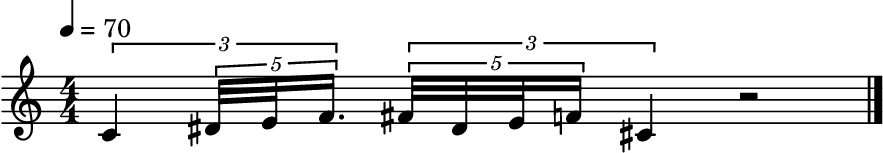

In [11]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(2, 3)),
    (63, F(2, 3)*F(1, 10)),
    (64, F(2, 3)*F(1, 10)),
    (65, F(2, 3)*F(3, 10)),
    
    (66, F(2, 3)*F(1, 10)),
    (63, F(2, 3)*F(1, 10)),
    (64, F(2, 3)*F(1, 10)),
    (65, F(2, 3)*F(2, 10)),
    (61, F(2, 3)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
#quantprofile.rhythmComplexityWeight = 0.001
#quantprofile.divisionErrorWeight = 0.01
quantprofile.minBeatFractionAcrossBeats = F(1, 8)
quantprofile.minSymbolicDurationAcrossBeat = F(1, 3)

qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
# qpart.dump()
# r.write('~/tmp/quant.ly')
r

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:0.25 1/4♩», «4D# 0.25:0.438 3/16♩», «4E 0.438:0.625 3/16♩», «4F 0.625:0.812 3/16♩», «4F# 0.812:1 3/16♩», «4G 1:1.188 3/16♩», «4C 1.188:2.188 1♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:951:quantizeBeatBinary:DEBUG] Skipping (6, 5), gridError=0.14354260986049253 * 1.0 > minError=0.1401749648888217


Beat: 0 - 1 (dur: 1)
Best 8 divisions: (quantized in 91.8ms)


error,div,snapped,slots,info
0.0011,"(8, 8)","[«4C 0:0.25 1/4♩», «4D# 0.25:0.438 3/16♩», «4E 0.438:0.625 3/16♩», «4F 0.625:0.812 3/16♩», «4F# 0.812:1 3/16♩»]","[0, 4, 7, 10, 13]","gridError=0, rhythmComplexity=0.0894 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0141 (2.828e-05, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0818,"(6, 8)","[«4C 0:0.25 1/4♩», «4D# 0.25:0.417 1/6♩», «4E 0.417:0.625 5/24♩», «4F 0.625:0.812 3/16♩», «4F# 0.812:1 3/16♩»]","[0, 3, 5, 8, 11]","gridError=0.0817, rhythmComplexity=0.2 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.0224 (4.472e-05, divPenalty=0.0224, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1117,"(8, 5)","[«4C 0:0.25 1/4♩», «4D# 0.25:0.438 3/16♩», «4E 0.438:0.6 13/80♩», «4F 0.6:0.8 1/5♩», «4F# 0.8:1 1/5♩»]","[0, 4, 7, 9, 11]","gridError=0.112, rhythmComplexity=0.2 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.0224 (4.472e-05, divPenalty=0.0224, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1402,"(11,)","[«4C 0:0.273 3/11♩», «4D# 0.273:0.455 2/11♩», «4E 0.455:0.636 2/11♩», «4F 0.636:0.818 2/11♩», «4F# 0.818:1 2/11♩»]","[0, 3, 5, 7, 9]","gridError=0.14, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.1 (0.0002, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2588,"(9,)","[«4C 0:0.222 2/9♩», «4D# 0.222:0.444 2/9♩», «4E 0.444:0.667 2/9♩», «4F 0.667:0.778 1/9♩», «4F# 0.778:1 2/9♩»]","[0, 2, 4, 6, 7]","gridError=0.259, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.04 (8e-05, divPenalty=0.04, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2865,"(8,)","[«4C 0:0.25 1/4♩», «4D# 0.25:0.375 1/8♩», «4E 0.375:0.625 1/4♩», «4F 0.625:0.75 1/8♩», «4F# 0.75:1 1/4♩»]","[0, 2, 3, 5, 6]","gridError=0.287, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (2e-05, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.3086,"(7,)","[«4C 0:0.286 2/7♩», «4D# 0.286:0.429 1/7♩», «4E 0.429:0.571 1/7♩», «4F 0.571:0.857 2/7♩», «4F# 0.857:1 1/7♩»]","[0, 2, 3, 4, 6]","gridError=0.309, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.3479,"(6,)","[«4C 0:0.333 1/3♩», «4D# 0.333:0.5 1/6♩», «4E 0.5:0.667 1/6♩», «4F 0.667:0.833 1/6♩», «4F# 0.833:1 1/6♩»]","[0, 2, 3, 4, 5]","gridError=0.348, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:968:quantizeBeatBinary:DEBUG] Skipping (4, 1, 1, 1), totalError=0.005079370039680117 > minError=0.005019960159204454


Beat: 1 - 2 (dur: 1)
Best 3 divisions: (quantized in 21.6ms)


error,div,snapped,slots,info
0.0050,"(8, 1)","[«4G 0:0.188 3/16♩», «4C~ 0.188:1 13/16♩»]","[0, 3]","gridError=0, rhythmComplexity=0.5 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.01 (2e-05, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0335,"(11,)","[«4G 0:0.182 2/11♩», «4C~ 0.182:1 9/11♩»]","[0, 2]","gridError=0.0329, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.1 (0.0002, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0819,"(6,)","[«4G 0:0.167 1/6♩», «4C~ 0.167:1 5/6♩»]","[0, 1]","gridError=0.0817, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:968:quantizeBeatBinary:DEBUG] Skipping (4, 1, 1, 1), totalError=0.002408318915758459 > minError=0.002280350850198276


Beat: 2 - 3 (dur: 1)
Best 3 divisions: (quantized in 20.8ms)


error,div,snapped,slots,info
0.0023,"(8, 1)","[«~4C 0:0.188 3/16♩», «rest 0.188:1 13/16♩»]","[0, 3]","gridError=0, rhythmComplexity=0.224 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.01 (2e-05, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0280,"(11,)","[«~4C 0:0.182 2/11♩», «rest 0.182:1 9/11♩»]","[0, 2]","gridError=0.0273, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.1 (0.0002, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0678,"(6,)","[«~4C 0:0.167 1/6♩», «rest 0.167:1 5/6♩»]","[0, 1]","gridError=0.0677, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (4e-05, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «4C 0:0.25 1/4♩»
  «4D# 0.25:0.438 3/16♩»
  «4E 0.438:0.625 3/16♩»
  «4F 0.625:0.812 3/16♩»
  «4F# 0.812:1 3/16♩»
)
Node(1/1, 
  «4G 1:1.188 3/16♩»
  «4C~ 1.188:1.25 1/16♩»
  «~4C~ 1.25:2 3/4♩»
)
----> no need to extend node over beat
[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «4G 1:1.188 3/16♩»
  «4C~ 1.188:1.25 1/16♩»
  «~4C~ 1.25:2 3/4♩»
)
Node(1/1, 
  «~4C 2:2.188 3/16♩»
  «rest 2.188:2.25 1/16♩»
  «rest 2.25:3 3/4♩»
)
----> Cannot merge notations resulting in irregular durations. Resulting symbolic duration: 15/16
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «~4C 2:2.188 3/16♩»
  «rest 2.188:2.25 1/16♩»
  «rest 2.25:3 3/4♩»
)
    Node(1/1, 
  «rest 3:4 1♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «~4C 2:2.188 3/16♩»
  «rest 2.188:2.25 1/16♩»
  «rest 2.25:4 7/4♩»


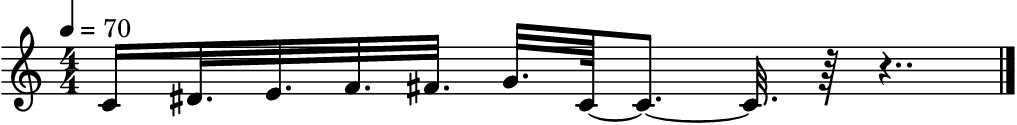

In [12]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F

notes = [
    (60, F(1, 4)),
    (63, F(1, 4)*F(3, 4)),
    (64, F(1, 4)*F(3, 4)),
    (65, F(1, 4)*F(3, 4)),
    (66, F(1, 4)*F(3, 4)),
    (67, F(1, 4)*F(3, 4)),
    (60, F(1)),
    
]

notations = [scoring.makeNote(p, d) for p, d in notes]
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notations)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C~ 0:0.25 1/4♩ spanners=[Slur(kind=start, linetype=solid, nestingLevel=1, uuid=ta4q8hsw)]», «4C~gliss 0.25:0.5 1/4♩», «~4Cgliss 0.5:0.75 1/4♩», «4F 0.75:1 1/4♩ spanners=[Slur(kind=end, linetype=solid, nestingLevel=1, uuid=ta4q8hsw)]»]). Filling gaps with silences
[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «4C~ 0:0.25 1/4♩ spanners=[Slur(kind=start, linetype=solid, nestingLevel=1, uuid=ta4q8hsw)]»
  «4Cgliss 0.25:0.75 1/2♩»
  «4F 0.75:1 1/4♩ spanners=[Slur(kind=end, linetype=solid, nestingLevel=1, uuid=ta4q8hsw)]»
)
Node(1/1, 
  «rest 1:2 1♩»
)
----> no need to extend node over beat
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 1:2 1♩»
)
    Node(1/1, 
  «rest 2:3 1♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «rest 1:3 2♩»
)
[maelzel.scoring:quant.py:1677:_mer

Part #0:
  Measure #0
    Timesig: 4/4(quarter=70)
    Node ratio: 1/1, offset=0, end=4, dur=4, symbolicdur=4
      Node ratio: 1/1, offset=0, end=1, dur=1, symbolicdur=1
        «4C~ 0:0.25 1/4♩ spanners=[Slur(kind=start, linetype=solid, nestingLevel=1,
          uuid=ta4q8hsw)]»
        «4Cgliss 0.25:0.75 1/2♩»
        «4F 0.75:1 1/4♩ spanners=[Slur(kind=end, linetype=solid, nestingLevel=1, uuid=ta4q8hsw)]»
      Node ratio: 1/1, offset=1, end=4, dur=3, symbolicdur=3
        «rest 1:4 3♩»


[maelzel.scoring:renderlily.py:1154:write:DEBUG] Found crop file /home/em/.cache/tmpsi9ddzcl/i1wkx_93.cropped.png, using that as output



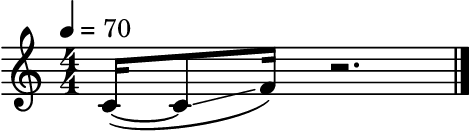

In [13]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(1, 4), tiedNext=True),
    makeNote(60, F(1, 4), tiedNext=True, gliss=True),
    makeNote(60, F(1, 4), tiedPrev=True),
    makeNote(65, F(1, 4))
]

notes[0].addSpanner(spanner.Slur(), notes[-1])
struct = ScoreStruct(timesig='4/4', tempo=70)

part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('highest', debug=False, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
score.dump()
r # .write('~/tmp/quant.ly')

Meas. Index,Timesig,Tempo (quarter note),Label,Rehearsal,Barline
0,"7/8([Fraction(1, 1), Fraction(3, 2), Fraction(1, 1)])",52,,,
1,7/8,,,,
...,,,,,


[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 7/8 is not filled (events=[«4D 0:0.375 3/8♩», «4C 0.375:0.75 3/8♩», «4D 0.75:1.125 3/8♩», «4C 1.125:1.5 3/8♩», «4C# 1.5:1.633 2/15♩», «4D 1.633:1.767 2/15♩», «4D# 1.767:1.9 2/15♩», «4E 1.9:2.033 2/15♩», «4F 2.033:2.167 2/15♩», «4F# 2.167:2.333 1/6♩», «4G 2.333:2.5 1/6♩»]). Filling gaps with silences


Beat: 0 - 1 (dur: 1)
Best 2 divisions: (quantized in 11.6ms)


error,div,snapped,slots,info
0.0010,"(8,)","[«4D 0:0.375 3/8♩», «4C 0.375:0.75 3/8♩», «4D~ 0.75:1 1/4♩»]","[0, 3, 6]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1606,"(5,)","[«4D 0:0.4 2/5♩», «4C 0.4:0.8 2/5♩», «4D~ 0.8:1 1/5♩»]","[0, 2, 4]","gridError=0.161, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 3/2 (dur: 1/2)
Best 3 divisions: (quantized in 2.9ms)


error,div,snapped,slots,info
0.0010,"(4,)","[«~4D 0:0.125 1/8♩», «4C 0.125:0.5 3/8♩»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1034,"(7,)","[«~4D 0:0.143 1/7♩», «4C 0.143:0.5 5/14♩»]","[0, 2]","gridError=0.102, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1318,"(5,)","[«~4D 0:0.1 1/10♩», «4C 0.1:0.5 2/5♩»]","[0, 1]","gridError=0.132, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:951:quantizeBeatBinary:DEBUG] Skipping (8,), gridError=0.27930552681730186 * 1.0 > minError=0.26711707137543517
[maelzel.scoring:quant.py:951:quantizeBeatBinary:DEBUG] Skipping (11,), gridError=0.2790225199146464 * 1.0 > minError=0.26711707137543517
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (5, 5, 6, 5), divPenalty=0.0460555 * 0.1 > minError=0.00459147
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (5, 5, 6, 7), divPenalty=0.0460555 * 0.1 > minError=0.00459147
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (5, 7, 6, 5), divPenalty=0.0460555 * 0.1 > minError=0.00459147
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (7, 5, 6, 5), divPenalty=0.0460555 * 0.1 > minError=0.00459147
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (5, 7, 6, 7), divPenalty=0.0460555 * 0.1 > minError=0.00459147
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (7, 5, 6, 7), divPe

Beat: 3/2 - 5/2 (dur: 1)
Best 12 divisions: (quantized in 45.9ms)


error,div,snapped,slots,info
0.0046,"(5, 5, 2)","[«4C# 0:0.133 2/15♩», «4D 0.133:0.267 2/15♩», «4D# 0.267:0.4 2/15♩», «4E 0.4:0.533 2/15♩», «4F 0.533:0.667 2/15♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 2, 4, 6, 8, 10, 11]","gridError=0, rhythmComplexity=0.0639 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0412 (0.0004123, divPenalty=0.0283, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0974,"(5, 5, 5)","[«4C# 0:0.133 2/15♩», «4D 0.133:0.267 2/15♩», «4D# 0.267:0.4 2/15♩», «4E 0.4:0.533 2/15♩», «4F 0.533:0.667 2/15♩», «4F# 0.667:0.8 2/15♩», «4G 0.8:1 1/5♩»]","[0, 2, 4, 6, 8, 10, 12]","gridError=0.0972, rhythmComplexity=0.0639 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0458 (0.0004583, divPenalty=0.0346, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0985,"(11, 9)","[«4C# 0:0.136 3/22♩», «4D 0.136:0.273 3/22♩», «4D# 0.273:0.409 3/22♩», «4E 0.409:0.556 0.146♩», «4F 0.556:0.667 1/9♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 3, 6, 9, 12, 14, 17]","gridError=0.0977, rhythmComplexity=0.143 (numNotesAcrossSubdivs=1, numTies=1), divPenalty=0.112 (0.001118, divPenalty=0.112, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1276,"(11, 3)","[«4C# 0:0.136 3/22♩», «4D 0.136:0.273 3/22♩», «4D# 0.273:0.409 3/22♩», «4E 0.409:0.5 1/11♩», «4F 0.5:0.667 1/6♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 3, 6, 9, 11, 12, 13]","gridError=0.127, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.1 (0.001, divPenalty=0.1, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1553,"(7, 9)","[«4C# 0:0.143 1/7♩», «4D 0.143:0.286 1/7♩», «4D# 0.286:0.429 1/7♩», «4E 0.429:0.556 8/63♩», «4F 0.556:0.667 1/9♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 2, 4, 6, 8, 10, 13]","gridError=0.155, rhythmComplexity=0.0639 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0539 (0.0005385, divPenalty=0.0539, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1623,"(4, 3)","[«4C# 0:0.125 1/8♩», «4D 0.125:0.25 1/8♩», «4D# 0.25:0.375 1/8♩», «4E 0.375:0.5 1/8♩», «4F 0.5:0.667 1/6♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 1, 2, 3, 4, 5, 6]","gridError=0.162, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1859,"(7, 3)","[«4C# 0:0.143 1/7♩», «4D 0.143:0.286 1/7♩», «4D# 0.286:0.429 1/7♩», «4E 0.429:0.5 1/14♩», «4F 0.5:0.667 1/6♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 2, 4, 6, 7, 8, 9]","gridError=0.186, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.2217,"(6, 3)","[«4C# 0:0.167 1/6♩», «4D 0.167:0.25 1/12♩», «4D# 0.25:0.417 1/6♩», «4E 0.417:0.5 1/12♩», «4F 0.5:0.667 1/6♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 2, 3, 5, 6, 7, 8]","gridError=0.222, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2217,"(5, 3)","[«4C# 0:0.1 1/10♩», «4D 0.1:0.3 1/5♩», «4D# 0.3:0.4 1/10♩», «4E 0.4:0.5 1/10♩», «4F 0.5:0.667 1/6♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:1 1/6♩»]","[0, 1, 3, 4, 5, 6, 7]","gridError=0.222, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.2671,"(7,)","[«4C# 0:0.143 1/7♩», «4D 0.143:0.286 1/7♩», «4D# 0.286:0.429 1/7♩», «4E 0.429:0.571 1/7♩», «4F 0.571:0.714 1/7♩», «4F# 0.714:0.857 1/7♩», «4G 0.857:1 1/7♩»]","[0, 1, 2, 3, 4, 5, 6]","gridError=0.267, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:951:quantizeBeatBinary:DEBUG] Skipping (7,), gridError=0.33811543737434147 * 1.0 > minError=0.32746592198103763
[maelzel.scoring:quant.py:951:quantizeBeatBinary:DEBUG] Skipping (4, 4), gridError=0.11321930132219958 * 1.0 > minError=0.1107158148720805
[maelzel.scoring:quant.py:951:quantizeBeatBinary:DEBUG] Skipping (8, 8, 7), gridError=0.05586442079826756 * 1.0 > minError=0.0539618140713603


Beat: 1 - 2 (dur: 1)
Best 6 divisions: (quantized in 49.3ms)


error,div,snapped,slots,info
0.0540,"(4, 11)","[«~4D 0:0.125 1/8♩», «4C 0.125:0.5 3/8♩», «4C# 0.5:0.636 3/22♩», «4D 0.636:0.773 3/22♩», «4D# 0.773:0.909 3/22♩», «4E~ 0.909:1 1/11♩»]","[0, 1, 4, 7, 10, 13]","gridError=0.053, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.1 (0.001005, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0957,"(7, 11)","[«~4D 0:0.143 1/7♩», «4C 0.143:0.5 5/14♩», «4C# 0.5:0.636 3/22♩», «4D 0.636:0.773 3/22♩», «4D# 0.773:0.909 3/22♩», «4E~ 0.909:1 1/11♩»]","[0, 2, 7, 10, 13, 16]","gridError=0.095, rhythmComplexity=0.149 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.102 (0.00102, divPenalty=0.102, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1107,"(5, 11)","[«~4D 0:0.1 1/10♩», «4C 0.1:0.5 2/5♩», «4C# 0.5:0.636 3/22♩», «4D 0.636:0.773 3/22♩», «4D# 0.773:0.909 3/22♩», «4E~ 0.909:1 1/11♩»]","[0, 1, 5, 8, 11, 14]","gridError=0.11, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.102 (0.00102, divPenalty=0.102, cardinalityPenalty=0.1, numSubdivsPenalty=0, levelPenalty=0)"
0.1132,"(8,)","[«~4D 0:0.125 1/8♩», «4C 0.125:0.5 3/8♩», «4C# 0.5:0.625 1/8♩», «4D 0.625:0.75 1/8♩», «4D# 0.75:0.875 1/8♩», «4E~ 0.875:1 1/8♩»]","[0, 1, 4, 5, 6, 7]","gridError=0.113, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.3275,"(6,)","[«~4D 0:0.167 1/6♩», «4C 0.167:0.5 1/3♩», «4C# 0.5:0.667 1/6♩», «4D 0.667:0.833 1/6♩», «4D# 0.833:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(2, 15)}», «4E~ 0.833:1 1/6♩»]","[0, 1, 3, 4, 5, 5]","gridError=0.327, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.5192,"(5,)","[«~4D 0:0.2 1/5♩», «4C 0.2:0.4 1/5♩», «4C# 0.4:0.6 1/5♩», «4D 0.6:0.8 1/5♩», «4D# 0.8:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(2, 15)}», «4E~ 0.8:1 1/5♩»]","[0, 1, 2, 3, 4, 4]","gridError=0.519, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:968:quantizeBeatBinary:DEBUG] Skipping (3, 3, 3, 1), totalError=0.05879797211538941 > minError=0.057833394547459435


Beat: 2 - 5/2 (dur: 1/2)
Best 5 divisions: (quantized in 5.0ms)


error,div,snapped,slots,info
0.0578,"(4, 1, 1)","[«~4E 0:0.042 1/24♩», «4F 0.042:0.167 1/8♩», «4F# 0.167:0.333 1/6♩», «4G 0.333:0.5 1/6♩»]","[0, 1, 4, 5]","gridError=0.0578, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0579,"(6, 3)","[«~4E 0:0.042 1/24♩», «4F 0.042:0.167 1/8♩», «4F# 0.167:0.333 1/6♩», «4G 0.333:0.5 1/6♩»]","[0, 1, 4, 7]","gridError=0.0578, rhythmComplexity=0.112 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1208,"(9,)","[«~4E 0:0.056 1/18♩», «4F 0.056:0.167 1/9♩», «4F# 0.167:0.333 1/6♩», «4G 0.333:0.5 1/6♩»]","[0, 1, 3, 6]","gridError=0.121, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1416,"(3,)","[«~4E 0:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 30)}», «4F 0:0.167 1/6♩», «4F# 0.167:0.333 1/6♩», «4G 0.333:0.5 1/6♩»]","[0, 0, 1, 2]","gridError=0.142, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.3542,"(5,)","[«~4E 0:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 30)}», «4F 0:0.2 1/5♩», «4F# 0.2:0.3 1/10♩», «4G 0.3:0.5 1/5♩»]","[0, 0, 2, 3]","gridError=0.354, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «4D 0:0.375 3/8♩»
  «4C 0.375:0.75 3/8♩»
  «4D~ 0.75:1 1/4♩»
)
    Node(1/1, 
  «~4D 1:1.125 1/8♩»
  «4C 1.125:1.5 3/8♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «4D 0:0.375 3/8♩»
  «4C 0.375:0.75 3/8♩»
  «4D 0.75:1.125 3/8♩»
  «4C 1.125:1.5 3/8♩»
)
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(5/4, 
  «4C# 1.5:1.633 2/15♩ 3/2,5/4»
  «4D 1.633:1.767 2/15♩ 3/2,5/4»
  «4D#~ 1.767:1.833 1/15♩ 3/2,5/4»
)
    Node(5/4, 
  «~4D# 1.833:1.9 1/15♩ 3/2,5/4»
  «4E 1.9:2.033 2/15♩ 3/2,5/4»
  «4F 2.033:2.167 2/15♩ 3/2,5/4»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(5/4, 
  «4C# 1.5:1.633 2/15♩ 3/2,5/4»
  «4D 1.633:1.767 2/15♩ 3/2,5/4»
  «4D# 1.767:1.9 2/15♩ 3/2,5/4»
  «4E 1.9:2.033 2/15♩ 3/2,5/4»
  «4F 2.033:2.167 2/15♩ 3/2,5/4»
)
[maelzel.scoring:renderlily.py:1141:write:DEBUG] Rendering lil

Error: 0.005091473908568057, division: [Fraction(1, 2), Fraction(1, 1)]
Error: 0.08287851134509003, division: [Fraction(1, 1), Fraction(1, 2)]


[maelzel.scoring:renderlily.py:1154:write:DEBUG] Found crop file /home/em/.cache/tmpsi9ddzcl/bmsu65wl.cropped.png, using that as output



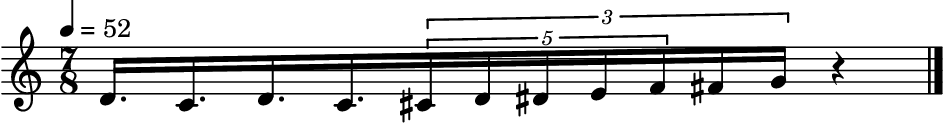

In [14]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(62, F(3, 4)*F(1, 2)),
    makeNote(60, F(3, 4)*F(1, 2)),
    makeNote(62, F(3, 4)*F(1, 2)),
    makeNote(60, F(3, 4)*F(1, 2)),
    
    makeNote(61, F(2, 3)*F(1, 5)),
    makeNote(62, F(2, 3)*F(1, 5)),
    makeNote(63, F(2, 3)*F(1, 5)),
    makeNote(64, F(2, 3)*F(1, 5)),
    makeNote(65, F(2, 3)*F(1, 5)),
    makeNote(66, F(2, 3)*F(1, 4)),
    makeNote(67, F(2, 3)*F(1, 4)), 
    
]

struct = ScoreStruct(timesig='7/8', tempo=52)
struct = ScoreStruct(r'''
7/8(2-3-2), 52
7/8
''')
struct.dump()
part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
r

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 3/4 is not filled (events=[«4C 0:0.667 2/3♩», «4C# 0.667:0.889 2/9♩», «4D 0.889:1.111 2/9♩», «4D# 1.111:1.333 2/9♩», «4E 1.333:2 2/3♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (1, 9), divPenalty=0.05 * 0.1 > minError=0.005


Beat: 0 - 1 (dur: 1)
Best 5 divisions: (quantized in 9.5ms)


error,div,snapped,slots,info
0.0030,"(1, 1, 3)","[«4C 0:0.667 2/3♩», «4C# 0.667:0.889 2/9♩», «4D~ 0.889:1 1/9♩»]","[0, 2, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0050,"(9,)","[«4C 0:0.667 2/3♩», «4C# 0.667:0.889 2/9♩», «4D~ 0.889:1 1/9♩»]","[0, 6, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1319,"(8,)","[«4C 0:0.625 5/8♩», «4C# 0.625:0.875 1/4♩», «4D~ 0.875:1 1/8♩»]","[0, 5, 7]","gridError=0.132, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1426,"(6,)","[«4C 0:0.667 2/3♩», «4C# 0.667:0.833 1/6♩», «4D~ 0.833:1 1/6♩»]","[0, 4, 5]","gridError=0.143, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2702,"(5,)","[«4C 0:0.6 3/5♩», «4C# 0.6:0.8 1/5♩», «4D~ 0.8:1 1/5♩»]","[0, 3, 4]","gridError=0.27, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (9, 1), divPenalty=0.05 * 0.1 > minError=0.005


Beat: 1 - 2 (dur: 1)
Best 5 divisions: (quantized in 7.0ms)


error,div,snapped,slots,info
0.0030,"(3, 1, 1)","[«~4D 0:0.111 1/9♩», «4D# 0.111:0.333 2/9♩», «4E 0.333:1 2/3♩»]","[0, 1, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0050,"(9,)","[«~4D 0:0.111 1/9♩», «4D# 0.111:0.333 2/9♩», «4E 0.333:1 2/3♩»]","[0, 1, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1319,"(8,)","[«~4D 0:0.125 1/8♩», «4D# 0.125:0.375 1/4♩», «4E 0.375:1 5/8♩»]","[0, 1, 3]","gridError=0.132, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1426,"(6,)","[«~4D 0:0.167 1/6♩», «4D# 0.167:0.333 1/6♩», «4E 0.333:1 2/3♩»]","[0, 1, 2]","gridError=0.143, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2702,"(5,)","[«~4D 0:0.2 1/5♩», «4D# 0.2:0.4 1/5♩», «4E 0.4:1 3/5♩»]","[0, 1, 2]","gridError=0.27, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4C 0:0.667 2/3♩ 3/2»
  Node(3/2, 
    «4C# 0.667:0.889 2/9♩ 3/2,3/2»
    «4D~ 0.889:1 1/9♩ 3/2,3/2»
  )
)
    Node(3/2, 
  Node(3/2, 
    «~4D 1:1.111 1/9♩ 3/2,3/2»
    «4D# 1.111:1.333 2/9♩ 3/2,3/2»
  )
  «4E 1.333:2 2/3♩ 3/2»
)
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4C# 0.667:0.889 2/9♩ 3/2,3/2»
  «4D~ 0.889:1 1/9♩ 3/2,3/2»
)
    Node(3/2, 
  «~4D 1:1.111 1/9♩ 3/2,3/2»
  «4D# 1.111:1.333 2/9♩ 3/2,3/2»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4C# 0.667:0.889 2/9♩ 3/2,3/2»
  «4D 0.889:1.111 2/9♩ 3/2,3/2»
  «4D# 1.111:1.333 2/9♩ 3/2,3/2»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4C 0:0.667 2/3♩ 3/2»
  Node(3/2, 
    «4C# 0.667:0.889 2/9♩ 3/2,3/2»
    «4D 0.889:1.111 2/9♩ 3/2,3/2»
    «4D# 1.111:1.333 2/9♩ 3/2,3/2»
  )
  «4E 1.333:2 2/3♩ 3/2»
)
[maelzel.


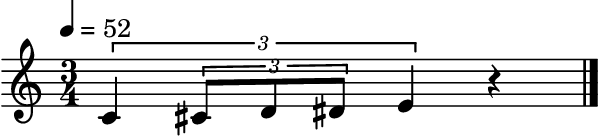

In [15]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(2, 3)),
    makeNote(61, F(2, 9)),
    makeNote(62, F(2, 9)),
    makeNote(63, F(2, 9)),
    makeNote(64, F(2, 3)),
    
]

struct = ScoreStruct(timesig='3/4', tempo=52)

part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 3/4 is not filled (events=[«4C 0:0.667 2/3♩», «4C# 0.667:0.889 2/9♩», «4D 0.889:1.111 2/9♩», «4D# 1.111:1.222 1/9♩», «4E 1.222:1.333 1/9♩», «4F 1.333:2 2/3♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (1, 9), divPenalty=0.05 * 0.1 > minError=0.005


Beat: 0 - 1 (dur: 1)
Best 5 divisions: (quantized in 9.8ms)


error,div,snapped,slots,info
0.0030,"(1, 1, 3)","[«4C 0:0.667 2/3♩», «4C# 0.667:0.889 2/9♩», «4D~ 0.889:1 1/9♩»]","[0, 2, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0050,"(9,)","[«4C 0:0.667 2/3♩», «4C# 0.667:0.889 2/9♩», «4D~ 0.889:1 1/9♩»]","[0, 6, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1319,"(8,)","[«4C 0:0.625 5/8♩», «4C# 0.625:0.875 1/4♩», «4D~ 0.875:1 1/8♩»]","[0, 5, 7]","gridError=0.132, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1426,"(6,)","[«4C 0:0.667 2/3♩», «4C# 0.667:0.833 1/6♩», «4D~ 0.833:1 1/6♩»]","[0, 4, 5]","gridError=0.143, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2702,"(5,)","[«4C 0:0.6 3/5♩», «4C# 0.6:0.8 1/5♩», «4D~ 0.8:1 1/5♩»]","[0, 3, 4]","gridError=0.27, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (9, 1), divPenalty=0.05 * 0.1 > minError=0.005


Beat: 1 - 2 (dur: 1)
Best 5 divisions: (quantized in 7.1ms)


error,div,snapped,slots,info
0.0030,"(3, 1, 1)","[«~4D 0:0.111 1/9♩», «4D# 0.111:0.222 1/9♩», «4E 0.222:0.333 1/9♩», «4F 0.333:1 2/3♩»]","[0, 1, 2, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0050,"(9,)","[«~4D 0:0.111 1/9♩», «4D# 0.111:0.222 1/9♩», «4E 0.222:0.333 1/9♩», «4F 0.333:1 2/3♩»]","[0, 1, 2, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1662,"(8,)","[«~4D 0:0.125 1/8♩», «4D# 0.125:0.25 1/8♩», «4E 0.25:0.375 1/8♩», «4F 0.375:1 5/8♩»]","[0, 1, 2, 3]","gridError=0.166, rhythmComplexity=0.224 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2030,"(6,)","[«~4D 0:0.167 1/6♩», «4D# 0.167:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 9)}», «4E 0.167:0.333 1/6♩», «4F 0.333:1 2/3♩»]","[0, 1, 1, 2]","gridError=0.203, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2957,"(5,)","[«~4D 0:0.2 1/5♩», «4D# 0.2:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 9)}», «4E 0.2:0.4 1/5♩», «4F 0.4:1 3/5♩»]","[0, 1, 1, 2]","gridError=0.296, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4C 0:0.667 2/3♩ 3/2»
  Node(3/2, 
    «4C# 0.667:0.889 2/9♩ 3/2,3/2»
    «4D~ 0.889:1 1/9♩ 3/2,3/2»
  )
)
    Node(3/2, 
  Node(3/2, 
    «~4D 1:1.111 1/9♩ 3/2,3/2»
    «4D# 1.111:1.222 1/9♩ 3/2,3/2»
    «4E 1.222:1.333 1/9♩ 3/2,3/2»
  )
  «4F 1.333:2 2/3♩ 3/2»
)
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4C# 0.667:0.889 2/9♩ 3/2,3/2»
  «4D~ 0.889:1 1/9♩ 3/2,3/2»
)
    Node(3/2, 
  «~4D 1:1.111 1/9♩ 3/2,3/2»
  «4D# 1.111:1.222 1/9♩ 3/2,3/2»
  «4E 1.222:1.333 1/9♩ 3/2,3/2»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4C# 0.667:0.889 2/9♩ 3/2,3/2»
  «4D 0.889:1.111 2/9♩ 3/2,3/2»
  «4D# 1.111:1.222 1/9♩ 3/2,3/2»
  «4E 1.222:1.333 1/9♩ 3/2,3/2»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4C 0:0.667 2/3♩ 3/2»
  Node(3/2, 
    «4C# 0.667:0.889 2/9♩ 3/2,3/2»
    «4D 0.


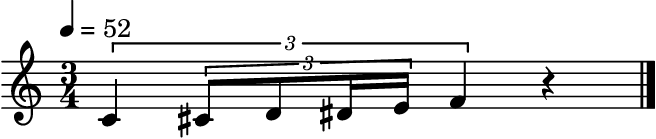

In [16]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(2, 3)),
    makeNote(61, F(2, 9)),
    makeNote(62, F(2, 9)),
    makeNote(63, F(1, 9)),
    makeNote(64, F(1, 9)),
    
    makeNote(65, F(2, 3)),
    
]

struct = ScoreStruct(timesig='3/4', tempo=52)

part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
quantprofile.maxGridDensity = 32
quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 3/4 is not filled (events=[«rest 0:0.333 1/3♩», «4C 0.333:1 2/3♩», «4C# 1:1.667 2/3♩», «4D 1.667:1.889 2/9♩», «4D# 1.889:2 1/9♩», «4E 2:2.111 1/9♩»]). Filling gaps with silences


Beat: 0 - 1 (dur: 1)
Best 2 divisions: (quantized in 1.1ms)


error,div,snapped,slots,info
0.0000,"(3,)","[«rest 0:0.333 1/3♩», «4C 0.333:1 2/3♩»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1636,"(5,)","[«rest 0:0.4 2/5♩», «4C 0.4:1 3/5♩»]","[0, 2]","gridError=0.164, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (1, 9), divPenalty=0.05 * 0.1 > minError=0.005


Beat: 1 - 2 (dur: 1)
Best 5 divisions: (quantized in 9.0ms)


error,div,snapped,slots,info
0.0030,"(1, 1, 3)","[«4C# 0:0.667 2/3♩», «4D 0.667:0.889 2/9♩», «4D# 0.889:1 1/9♩»]","[0, 2, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0050,"(9,)","[«4C# 0:0.667 2/3♩», «4D 0.667:0.889 2/9♩», «4D# 0.889:1 1/9♩»]","[0, 6, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1319,"(8,)","[«4C# 0:0.625 5/8♩», «4D 0.625:0.875 1/4♩», «4D# 0.875:1 1/8♩»]","[0, 5, 7]","gridError=0.132, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1426,"(6,)","[«4C# 0:0.667 2/3♩», «4D 0.667:0.833 1/6♩», «4D# 0.833:1 1/6♩»]","[0, 4, 5]","gridError=0.143, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2702,"(5,)","[«4C# 0:0.6 3/5♩», «4D 0.6:0.8 1/5♩», «4D# 0.8:1 1/5♩»]","[0, 3, 4]","gridError=0.27, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (9, 1), divPenalty=0.05 * 0.1 > minError=0.005


Beat: 2 - 3 (dur: 1)
Best 5 divisions: (quantized in 6.2ms)


error,div,snapped,slots,info
0.0050,"(9,)","[«4E 0:0.111 1/9♩», «rest 0.111:1 8/9♩»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0412,"(8,)","[«4E 0:0.125 1/8♩», «rest 0.125:1 7/8♩»]","[0, 1]","gridError=0.0412, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0766,"(7,)","[«4E 0:0.143 1/7♩», «rest 0.143:1 6/7♩»]","[0, 1]","gridError=0.0766, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1174,"(6,)","[«4E 0:0.167 1/6♩», «rest 0.167:1 5/6♩»]","[0, 1]","gridError=0.117, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1658,"(5,)","[«4E 0:0.2 1/5♩», «rest 0.2:1 4/5♩»]","[0, 1]","gridError=0.166, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(3/2, 
  «rest 0:0.333 1/3♩ 3/2»
  «4C 0.333:1 2/3♩ 3/2»
)
Node(3/2, 
  «4C# 1:1.667 2/3♩ 3/2»
  Node(3/2, 
    «4D 1.667:1.889 2/9♩ 3/2,3/2»
    «4D# 1.889:2 1/9♩ 3/2,3/2»
  )
)
----> no need to extend node over beat
[maelzel.scoring:renderlily.py:1141:write:DEBUG] Rendering lilypond '/home/em/.cache/tmpsi9ddzcl/i9qnm74p.ly' to '/home/em/.cache/tmpsi9ddzcl/i9qnm74p.png'
[maelzel.scoring:renderlily.py:1154:write:DEBUG] Found crop file /home/em/.cache/tmpsi9ddzcl/i9qnm74p.cropped.png, using that as output



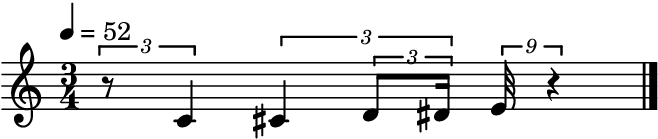

In [17]:
from maelzel import scoring
from maelzel.scorestruct import ScoreStruct
from maelzel.common import F
from maelzel.scoring import makeNote
from maelzel.scoring import spanner 

notes = [
    makeNote(60, F(2, 3), offset=F(1, 3)),
    makeNote(61, F(2, 3)),
    makeNote(62, F(2, 9)),
    makeNote(63, F(1, 9)),
    makeNote(64, F(1, 9)),
    
    
]

struct = ScoreStruct(timesig='3/4', tempo=52)

part = scoring.UnquantizedPart(notes)
quantprofile = scoring.quant.QuantizationProfile.fromPreset('high', debug=True, debugMaxDivisions=20, maxDivPenalty=0.1)
#quantprofile.maxGridDensity = 32
#quantprofile.mergeTupletsOfDifferentDuration = True
qpart = scoring.quant.quantizePart(part, struct=struct, quantprofile=quantprofile)
options = scoring.render.RenderOptions()
score = scoring.quant.QuantizedScore([qpart])
r = scoring.render.renderQuantizedScore(score, options)
#score.dump()
r# .write('~/tmp/quant.ly')